## **Logistic Regression and Transparency in Credit Card Approval**
---

**Challenge:**  
A significant concern when using Machine Learning for credit card approval/rejection is the lack of transparency. Customers often want to understand the reasoning behind their approval or rejection. When decisions are made manually, staff can provide specific reasons, making customers more likely to accept the outcome. However, many machine learning models struggle to offer this level of transparency, making it difficult to explain the factors influencing a decision.

**How Logistic Regression Addresses the Issue:**  
Logistic regression offers a solution by providing clear insights into how individual features—such as income, age, credit score, and others—affect the probability of approval. Each feature is associated with a coefficient that quantifies its impact on the log-odds of an applicant being classified as 'good' or 'bad'. This allows stakeholders to directly see which factors are driving the decision.

Additionally, logistic regression outputs a probability of approval rather than a simple binary classification (approved/rejected). This probabilistic approach provides a more nuanced understanding of the model's confidence in its decision. Furthermore, the decision threshold can be adjusted to align with the bank’s risk tolerance, offering flexibility and better alignment with organizational goals. This transparency helps customers better understand why a decision was made and fosters trust in the automated process.


# **Past Studies**


One relevant study is the thesis by Janapareddy and Yenduri (2023), titled “Credit Card Approval Prediction: A Comparative Analysis Between Logistic Regression Classifier, Random Forest Classifier, Support Vector Classifier with Ensemble Bagging Classifier” [1]. In their work, the authors implemented and evaluated multiple machine learning models—Logistic Regression Classifier (LRC), Random Forest Classifier (RFC), Support Vector Classifier (SVC), and an ensemble bagging classifier—on a credit card approval dataset.

Regarding the implementation of the logistic regression classifier, the authors did not explicitly specify the hyperparameter configuration. However, given that they utilized Scikit-learn for model development, it is reasonable to assume the use of default parameters. These typically include the ‘lbfgs’ solver, L2 regularization as the penalty term, and a regularization strength parameter C of 1.0, which serves as the inverse of the regularization strength. These settings are commonly used for balanced performance and computational efficiency in classification problems.

In terms of model performance, LRC achieved the following metrics on the test dataset:

Accuracy: 83.33%

Precision: 0.83

Recall: 0.84

F1 Score: 0.83

ROC-AUC Score: 0.83

Although LRC did not outperform the other models, particularly the RFC (which achieved the highest accuracy of 88.41% and ROC-AUC score of 0.88), its performance was consistent and relatively competitive across all metrics. The logistic regression model provided a strong baseline, particularly due to its interpretability and ability to capture relationships between features and the target variable.

**References**

[1] Janapareddy, D., & Yenduri, N. C. (2023). Credit Card Approval Prediction: A Comparative Analysis Between Logistic Regression Classifier, Random Forest Classifier, Support Vector Classifier with Ensemble Bagging Classifier. Retrieved from https://www.diva-portal.org/smash/get/diva2:1784289/FULLTEXT02.pdf









# **Approach**
After analyzing the dataset characteristics and reviewing relevant past studies, we adopted a structured, iterative methodology to develop a robust prediction model for credit card approval. Our approach ensures both technical validity and adaptability to the dataset's complexity. The steps are as follows:

**Baseline Model**: We began with a logistic regression model as a baseline due to its simplicity, interpretability, and effectiveness in binary classification tasks. This provides a reference point for performance evaluation and model improvements.

**Addressing Underfitting and Overfitting**: To mitigate issues of model generalization, we applied regularization techniques (e.g., L2 penalty in logistic regression), and later explored increased polynomial degree. These models inherently gave better results when properly tuned.

**Hyperparameter Tuning**: Using techniques such as grid search and cross-validation, we optimized hyperparameters to enhance model performance while avoiding overfitting. Each model was evaluated based on its ability to generalize to unseen data.

Our technical approach is well-suited for this binary classification task, with models chosen for their proven applicability to structured tabular data. The methodology ensures validity by gradually increasing model complexity in response to performance. Furthermore, we evaluated each model using standard and appropriate classification metrics, including **accuracy, precision, recall, F1 score, and ROC-AUC**. These metrics were carefully interpreted to identify trade-offs, particularly in the presence of class imbalance.

This pipeline supports the creation of a well-tuned and explainable model, while maintaining the flexibility to adapt to changes in data characteristics.

**Baseline Model**

Accuracy: 0.6296

Confusion Matrix:
[[  26   34]
 [2667 4565]]


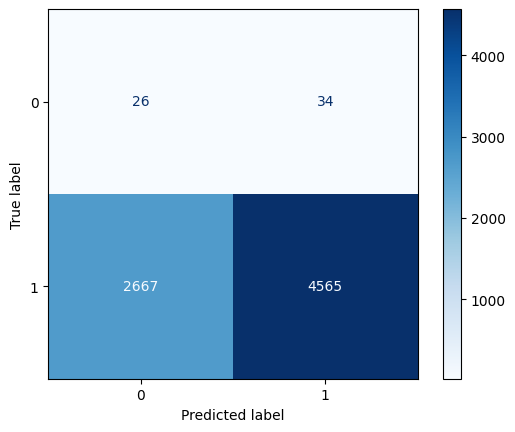


Classification Report:
              precision    recall  f1-score   support

           0     0.0097    0.4333    0.0189        60
           1     0.9926    0.6312    0.7717      7232

    accuracy                         0.6296      7292
   macro avg     0.5011    0.5323    0.3953      7292
weighted avg     0.9845    0.6296    0.7655      7292

ROC AUC Score: 0.5653


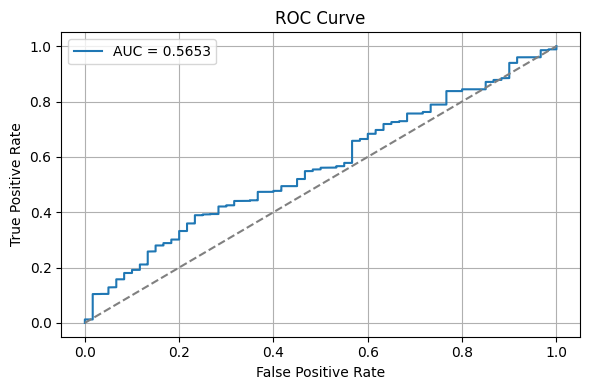

Training Accuracy: 0.6760
Test Accuracy: 0.6296


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Load data
train_data = pd.read_csv("train_dataset.csv")
test_data = pd.read_csv("test_dataset.csv")

# Define categorical and numerical features
categorical_features = ["NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE"]
numerical_features = [
    "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL",
    "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "CNT_FAM_MEMBERS", "AGE", "IS_EMPLOYED"
]

target = "TYPE"

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("scaler", StandardScaler(), numerical_features)
])

# Model pipeline with baseline logistic regression
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver="liblinear"))  # default C=1.0
])

# Split features and labels
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

y_train_pred = model.predict(X_train)

# Training and Test Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


## **Baseline model Evaluation**

The **low** training accuracy of 0.6760 and **low** test accuracy of 0.6296 indicates **under-fitting**.

Logistic regression does not perform well because the dataset is not linearly separable (as seen by the poor performance of linear SVM)

Very Low Precision for Class 0 (Reject):

*   Only ~1% of predicted rejections were actually rejections.

*   This means: most of the rejections predicted by your model are wrong (almost always approving).

Decent Recall for Class 0 (43.3%):

*   Out of the 60 actual rejections, your model correctly identified 26.

*   So it found some of the rejections, but not all.

Very High Precision for Class 1 (Approve):

*   When your model predicts “approve,” it's correct 99.3% of the time.

*   But this comes at a cost: it avoids saying “reject” unless very confident.

Accuracy: 62.96%:

*   Misleading due to class imbalance (only 60 out of 7292 are class 0).

*   A dumb model that predicts everything as 1 (approve) would already get ~99% accuracy.

ROC AUC Score: 0.565:

*   Barely better than random (0.5 = random guessing).

*   Shows that your model struggles to separate approvals from rejections.

To combat under-fitting, we need to make the model more complex by using **polynomial** functions

**Polynomial Feature Model**

Accuracy: 0.8378

Confusion Matrix:
[[  22   38]
 [1145 6087]]


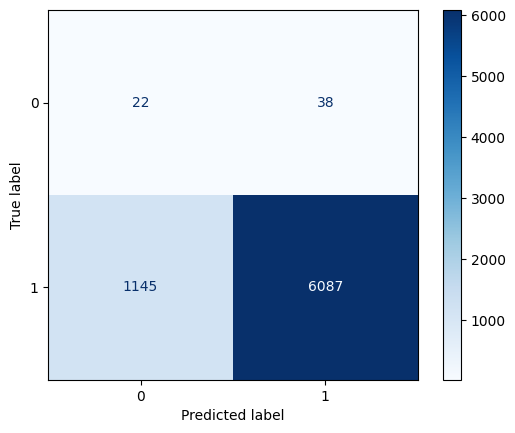


Classification Report:
              precision    recall  f1-score   support

           0     0.0189    0.3667    0.0359        60
           1     0.9938    0.8417    0.9114      7232

    accuracy                         0.8378      7292
   macro avg     0.5063    0.6042    0.4736      7292
weighted avg     0.9858    0.8378    0.9042      7292

ROC AUC Score: 0.6590


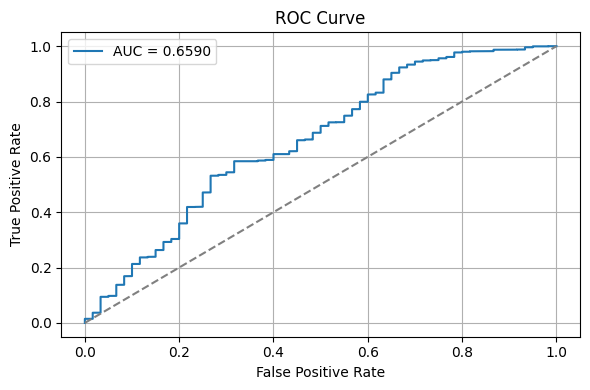

Training Accuracy: 0.8855
Test Accuracy: 0.8378


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Load data
train_data = pd.read_csv("train_dataset.csv")
test_data = pd.read_csv("test_dataset.csv")

# Define categorical and numerical features
categorical_features = ["NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE"]
numerical_features = [
    "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL",
    "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "CNT_FAM_MEMBERS", "AGE", "IS_EMPLOYED"
]

target = "TYPE"

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("scaler", StandardScaler(), numerical_features)
])

# Model pipeline with PolynomialFeatures and Logistic Regression
model = Pipeline([
    ("preprocessor", preprocessor),
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),  # Polynomial feature expansion (degree=2)
    ("classifier", LogisticRegression(max_iter=1000, solver="liblinear"))  # default C=1.0
])

# Split features and labels
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

y_train_pred = model.predict(X_train)

# Training and Test Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


## **Polynomial Feature Model Evaluation**

After adding polynomial regression, accuracy increased. However, the increase is mainly due to the model predicting more samples as Approve. The number of false positive (Incorrectly approving a rejected profile) increase from 34 to 38 which is not what we want.

The much higher training accuracy of 0.8855 compared to the test accuracy of 0.8378 indicates **potential** over-fitting

To combat over-fitting, we will need to use regularisation. We used 3-fold cross validation to find the best hyperparameters. We are choosing the best parameters using precision instead of accuaracy because we want to minimise the number of false positive (approving a person that should be rejected).

**3-fold cross validation** to tune **regularisation** hyperparameters

Best hyperparameters found:
  classifier__C: 10
  classifier__class_weight: None
  classifier__penalty: l1
  classifier__solver: liblinear
  poly_features__degree: 2

Accuracy: 0.8422

Confusion Matrix:
[[  23   37]
 [1114 6118]]


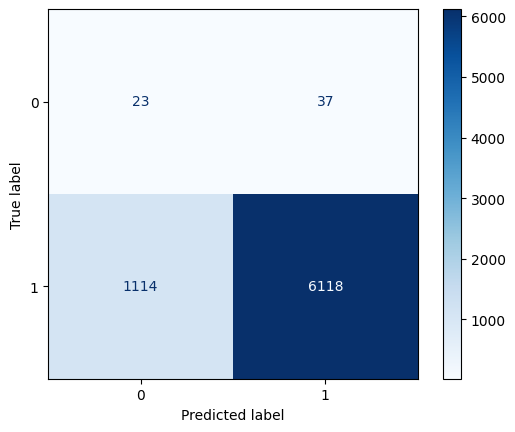


Classification Report:
              precision    recall  f1-score   support

           0     0.0202    0.3833    0.0384        60
           1     0.9940    0.8460    0.9140      7232

    accuracy                         0.8422      7292
   macro avg     0.5071    0.6146    0.4762      7292
weighted avg     0.9860    0.8422    0.9068      7292

ROC AUC Score: 0.6692


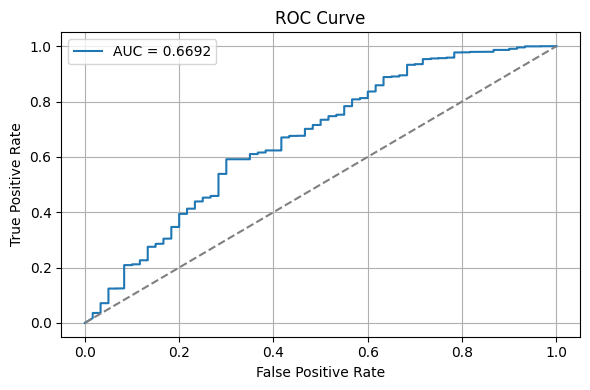


Training Accuracy: 0.8897
Test Accuracy: 0.8422


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Load data
train_data = pd.read_csv("train_dataset.csv")
test_data = pd.read_csv("test_dataset.csv")

# Define categorical and numerical features
categorical_features = ["NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE"]
numerical_features = [
    "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL",
    "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "CNT_FAM_MEMBERS", "AGE", "IS_EMPLOYED"
]

target = "TYPE"

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("scaler", StandardScaler(), numerical_features)
])

# Model pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("poly_features", PolynomialFeatures(include_bias=False)),  # Degree to be tuned
    ("classifier", LogisticRegression(max_iter=1000))  # Solver, penalty, and C to be tuned
])

# Split features and labels
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Define parameter grid
param_grid = {
    "poly_features__degree": [1, 2],
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__penalty": ["l1", "l2"],
    "classifier__solver": ["liblinear"],  # 'liblinear' supports both l1 and l2
    "classifier__class_weight": [None, "balanced"]
}

# GridSearchCV
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=3,
    scoring="precision",  # Focus on reducing false positives
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best hyperparameters found:")
for param, val in best_params.items():
    print(f"  {param}: {val}")

# Predict
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Accuracy
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Training and Test Accuracy
y_train_pred = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

We can see that the best hyperparameters to use is using l1 with C = 10 with 2nd order polynomial. The test accuracy increased from 0.8378 to 0.8422.

**Final Model Evaluation**

Our final model is a logistic regression with polynomial features using l1 regularisation with C = 10. We will explore which pair of features are the most important and find out why some individual instance level are incorrect.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import pandas as pd

# Load data
train_data = pd.read_csv("train_dataset.csv")
test_data = pd.read_csv("test_dataset.csv")

# Define categorical and numerical features
categorical_features = ["NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE"]
numerical_features = [
    "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL",
    "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "CNT_FAM_MEMBERS", "AGE", "IS_EMPLOYED"
]

target = "TYPE"

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("scaler", StandardScaler(), numerical_features)
])

# Model pipeline using fixed hyperparameters
model = Pipeline([
    ("preprocessor", preprocessor),
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("classifier", LogisticRegression(
        C=10,
        penalty="l1",
        solver="liblinear",
        class_weight="balanced",
        max_iter=1000
    ))
])

# Split features and labels
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Train model
model.fit(X_train, y_train)


# Get feature names after preprocessing
preprocessor = model.named_steps["preprocessor"]
poly = model.named_steps["poly_features"]
clf = model.named_steps["classifier"]

# Get one-hot feature names
onehot_feature_names = preprocessor.named_transformers_["onehot"].get_feature_names_out(categorical_features)
scaled_feature_names = numerical_features
all_features = np.concatenate([onehot_feature_names, scaled_feature_names])

# Get polynomial feature names
poly_feature_names = poly.get_feature_names_out(all_features)

# Get coefficients
coefficients = clf.coef_[0]
intercept = clf.intercept_[0]

# Create a DataFrame with feature names and their corresponding coefficients
coef_df = pd.DataFrame({
    "Feature": poly_feature_names,
    "Coefficient": coefficients
})

# Optionally include the intercept as a separate row
intercept_df = pd.DataFrame({
    "Feature": ["(Intercept)"],
    "Coefficient": [intercept]
})

# Combine intercept and coefficients
model_vector_df = pd.concat([intercept_df, coef_df], ignore_index=True)

model_vector_df.to_csv("model_vector.csv", index=False)



# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Get the transformed test set (for inspection, not needed for prediction)
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

# Combine with predicted probabilities
results_df = X_test_reset.copy()
results_df["True_Label"] = y_test_reset
results_df["Predicted_Probability"] = y_proba


results_df.to_csv("test_predictions_with_probabilities.csv", index=False)


# **Result interpretation**

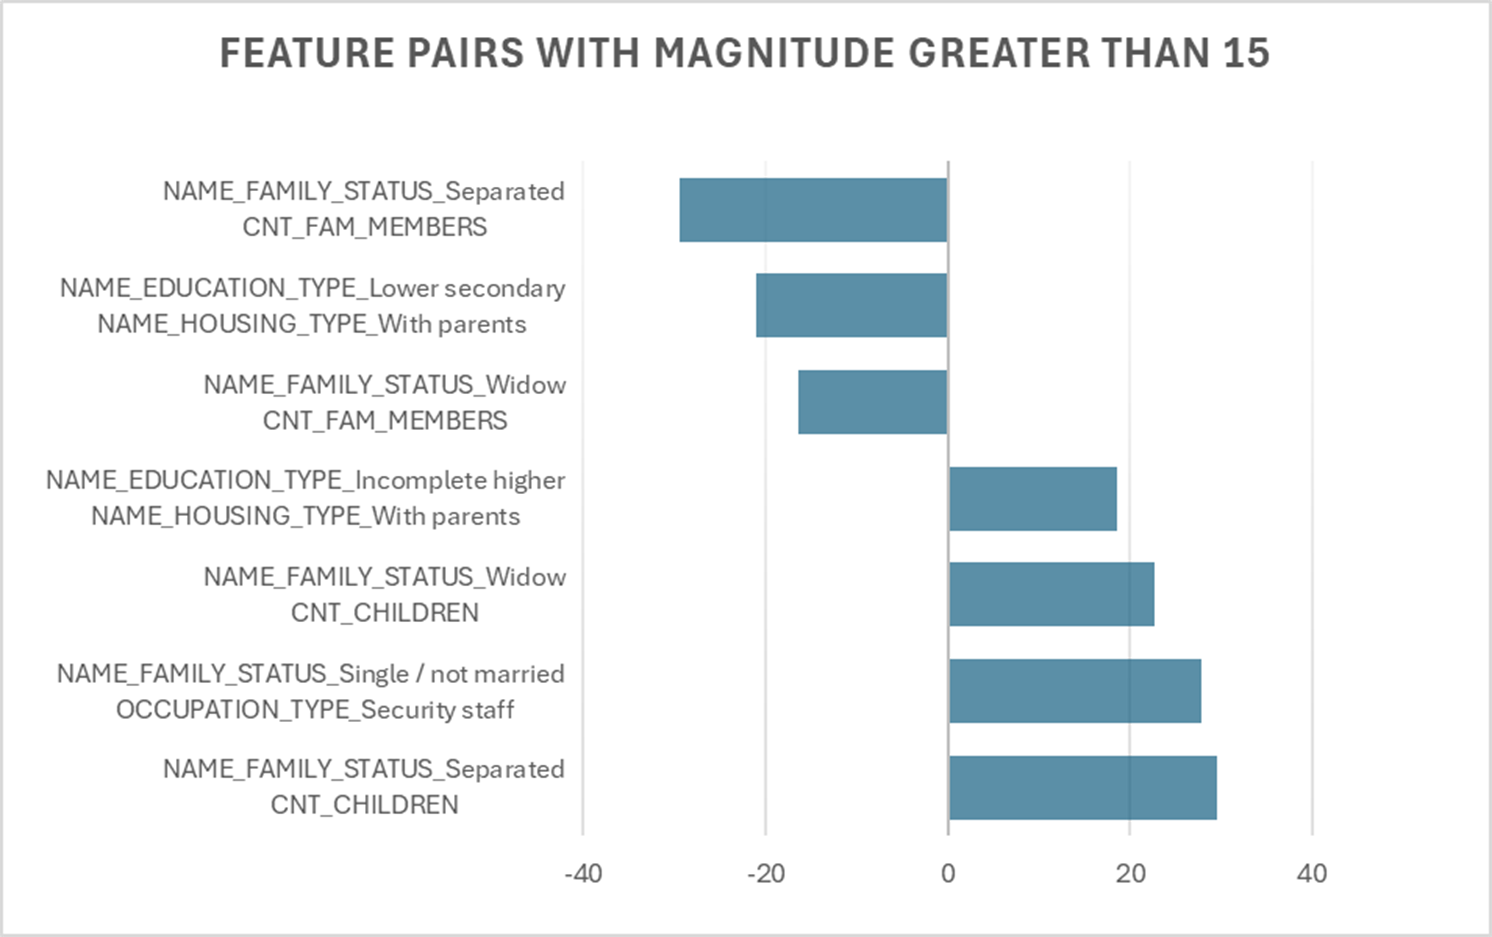

Why did the model improve?

With polynomial expansion, features are combined to create new and more complex features, which can better represent feature relationships.

Regularisation penalizes large feature weights to prevent overfitting, which can result in low test accuracy


Tuning regularization strength, type and polynomial order (between 1 & 2) to find the best performing model


### **Error Analysis**

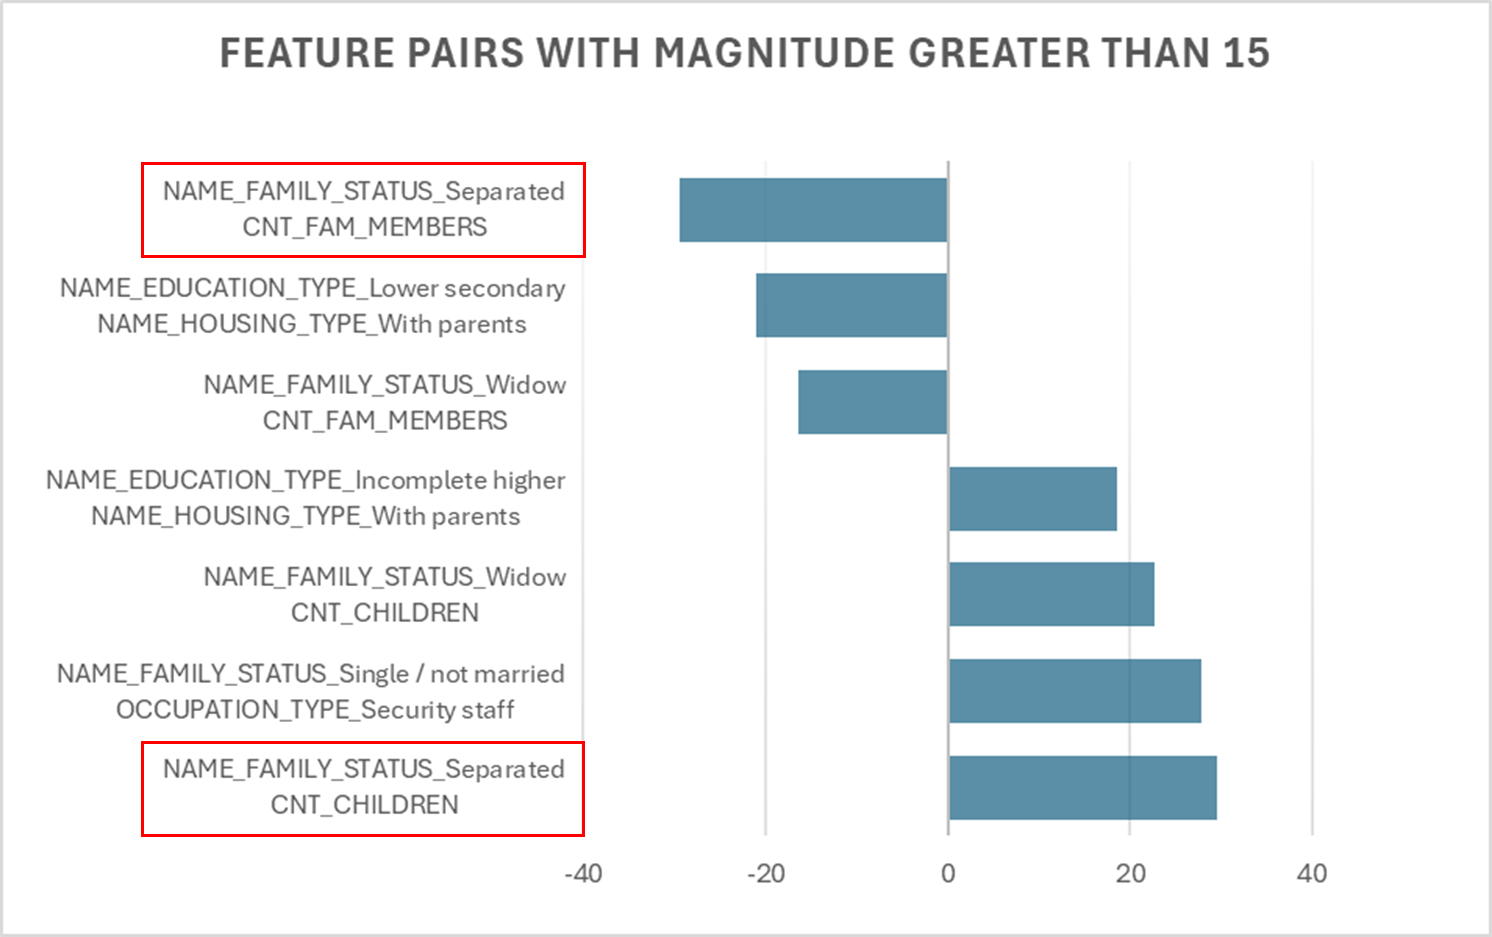

Separated and No. of Family members positively impact the approval rate the most.

Separated and No. of Children negatively impact the approval rate the most.

They have same base trait of being Separated, and children are correlated to family members, but they have vastly different weights/impacts.

The true relationship is more complex than what a degree-2 polynomial can represent. The model gives a strong positive weight to one feature pair, and a strong negative to another not because of their true meaning, but because that combination best separates classes in that limited model space. The opposite effects for similar feature pairs may be the model trying compensate for underfitting the true function


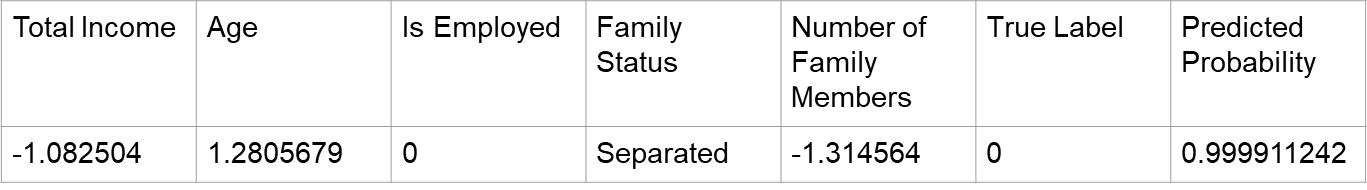

The model incorrectly predicted that this test instance should be approved, even though the true label indicates it should be rejected. One possible reason lies in the interaction between family status and family size: the individual is **Separated** and has a strongly negative normalized value for **CNT_FAM_MEMBERS**, which aligns with one of the most negatively weighted feature interactions in our model.

This strong negative coefficient inadvertently pushed the prediction toward approval, due to the way the polynomial model interprets such interactions.

However, this applicant is an unemployed pensioner with a very low income, a profile that, from a human or policy perspective, would typically be seen as high risk. The model appears to have underweighted the significance of low income and employment status, failing to penalize these sufficiently in the final decision.

This case illustrates a limitation of the model. While it captures certain interaction effects well, it may overlook critical individual features,especially when strong interaction terms dominate, leading to incorrect predictions.

### **Comparison to thesis model**


| Aspect | Our Model | Thesis Model |
|--------|------------|--------------|
| **Feature Scaling** | Yes (`StandardScaler`) | Likely yes|
| **Categorical Encoding** | One-hot encoding | Used label encoding |
| **Polynomial Features** | Yes (`PolynomialFeatures(degree=2)`) | No polynomial expansion mentioned |
| **Regularization** | L1 (sparse) | L2 (ridge-style) |
| **Solver** | `liblinear` (coordinate descent) | `lbfgs` (quasi-Newton) |

**Performance**

| **Metric** | **Our Model** | **Thesis Model** |
|------------|----------------|------------------|
| **Test Accuracy** | 0.8422 | 0.8333 |
| **ROC AUC** | 0.6692 | 0.83 |
| **Precision (overall)** | 0.9940 (Class 1) / 0.0202 (Class 0) | 0.83 (Presumably Class 1) |
| **Recall (overall)** | 0.8460 (Class 1) / 0.3833 (Class 0) | 0.84 (Presumably Class 1) |
| **F1 Score** | 0.9140 (Class 1) / 0.0384 (Class 0) | 0.83 (Presumably Class 1) |


**Analysis and Conclusion**

Looking at the table, the first obvious difference is the difference between the ROC AUC scores. As explained under error analysis, our LRC model does not separate the classes well, even though those are confident predictions as seen through the large coefficients.

However, it is hard to verify what exactly causes the difference. The main reasons that we can come up with are:



1.   Polynomial Degree
2.   Data preprocessing


**Using SMOTE in data-preprocessing**


We used train-test split and used SMOTE to generate new minority classes. It is possible that the particular seed of train data set are non-representative of the actual relationship. SMOTE can amplify its effect.

**Training the data at a higher polynomial degree**

From the error analysis, it is highly likely that our model is not complex enough. The thesis likely used a higher order model.


### **Future Improvements**



1.   We can explore training the model at a high degree, testing between L1 and L2 regularisation to see which performs best.
2.   We can try doing multiple train-test split at different seeds, then run model for each of the spilt data.
